# Part II - (Relationship between Some Borrower Features and the Loan Amount  Given/Taken Out)
## by (Seun Olukanmi)

## Investigation Overview
> In this investigation, I wanted to find the relationship between some borrower features and the loan amount given given/taken out. The questions of interest are stated below: 
> 1. What is the relationship between the borrowers' income range and the loan amount given/taken out?
> 2. What is the relationship between the prosper rating (Alpha) of the borrower and the loan amount given/taken out?
> 3. What is the relationship between the loan amount given/taken out and a borrower indicating they have the required documentation to support their income?  
## Dataset Overview
> The data set contains 113,937 loans with 81 features on each loan, including loan amount, interest rate (or borrower rate), current loan status, borrower income, and a lot more. From observation of the data dictionary, the features can be classified into two (2) main categories namely: borrower features, and loan performance data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

## (Distribution of Loan Amounts Given/Taken out)

> The distribution plot shows that the loan amount tends to be right skewed with the most frequently loaned amount being 4000. Above the loan value of 5000, there are relative spikes at each increment of 5000.

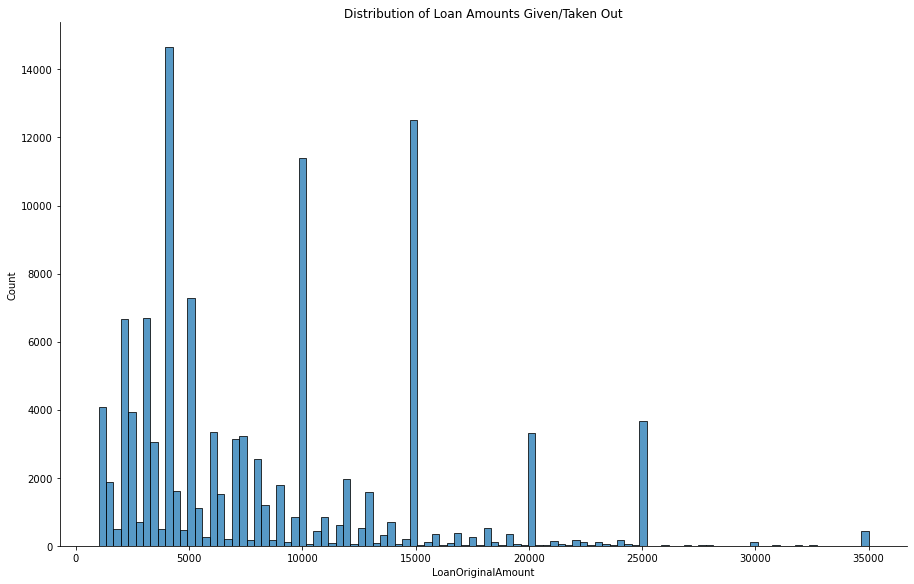

In [3]:
sns.displot(data = df, x = 'LoanOriginalAmount', height = 8, aspect = 1.6)
plt.title('Distribution of Loan Amounts Given/Taken Out');

## (Relationship between the income range of borrowers and the loan original amounts)

> The income range of the borrowers included 0, 'not employed' and the 'not displayed' which seem ambiguous. For this reason, these three categories were merged to reduce ambiguity. The plot shows that borrowers in the income range 100,000 and above are the only group that took loan above 25,000. It was also observed that all income groups have the same minimum loan amount. It was observed that the median loan amount increases as the income range of the borrowers increase. The maximum loan amount also generally increases with income range. The box plot shows that some borrowers in the 3 lower income ranges (from 0 to 49,999) are outliers, borrowing up to a maximum of 25,000. 

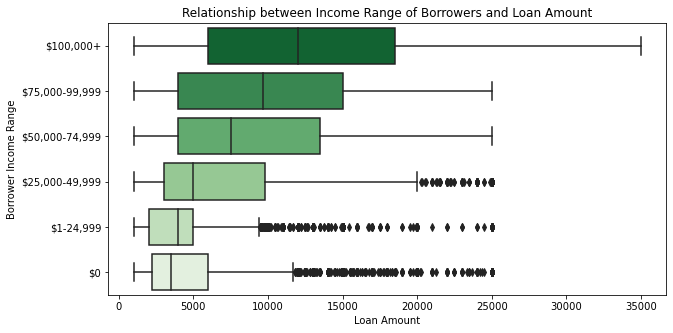

In [4]:
#Combining the 3 categories 
df['IncomeRange'].replace(['Not displayed', 'Not employed'], '$0', inplace = True)

#I have to create ordinal categories (from largest to smallest) for the income range before creating the chart
ordinalCategory = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999','$0']
orderedVar = pd.api.types.CategoricalDtype(ordered = True, categories = ordinalCategory)
df['IncomeRange'] = df['IncomeRange'].astype(orderedVar)

# boxplot showing relationship between income range of borrowers and the loan amount
plt.figure(figsize = [10, 5])
sns.boxplot(data = df, y = 'IncomeRange', x = 'LoanOriginalAmount', palette = "Greens_r")
plt.ylabel('Borrower Income Range')
plt.xlabel('Loan Amount')
plt.title('Relationship between Income Range of Borrowers and Loan Amount');

## (Relationship between the prosper rating (Alpha) of the borrower and the loan amount given/taken out)
The Prosper Rating (Alpha) is assigned at the time the loan listing was created and it ranges between AA - HR.  The rating is applicable for loans originated after July 2009.
The box plot shows that the poorer the rating, the lower the loan amount given/taken out. From the univariate exploration of the loan amounts, 4000 was the highest. The plot seems to show that generally most of the 4000 loans were taken by the poorly rated borrowers. There are some outliers though.



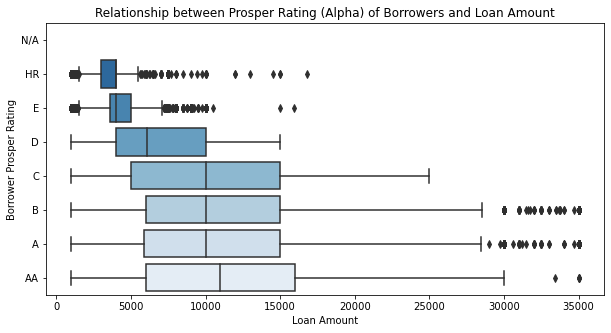

In [5]:
# Here, I am renaming the 'ProsperRating (Alpha)' column to remove the space in the column name
df.rename(columns = {'ProsperRating (Alpha)':'ProsperRating_Alpha'}, inplace = True)

### An ordered list of the ratings is created following the inherent order of the values
pRatings = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'] #ordered from worst to best
pRatings_type = pd.api.types.CategoricalDtype(categories= pRatings, ordered = True)
df['ProsperRating_Alpha'] = df['ProsperRating_Alpha'].astype(pRatings_type)

df_prosper_rating = df.query('ProsperRating_Alpha != "N/A"') #Dropping the N/A rows

# boxplot showing relationship between prosper rating of borrowers and the loan amount. The N/A's were dropped
plt.figure(figsize = [10, 5])
sns.boxplot(data = df_prosper_rating, y = 'ProsperRating_Alpha', x = 'LoanOriginalAmount', palette = "Blues_r")
plt.ylabel('Borrower Prosper Rating')
plt.xlabel('Loan Amount')
plt.title('Relationship between Prosper Rating (Alpha) of Borrowers and Loan Amount');

## Relationship between the loan amount given/taken out and a borrower indicating they have the required documentation to support their income 
IncomeVerifiable is a boolean variable that shows whether the borrower has indicated that they have the required documentation to support their income.
For borrowers with verifiable income and those without supporting documents to verify their income, the median loan amount increases as income range increases. However, the overall maximum loan amount given/taken out is significantly higher for borrowers with verifiable income. Only borrowers with verifiable income were given loan amounts beyond 25,000.

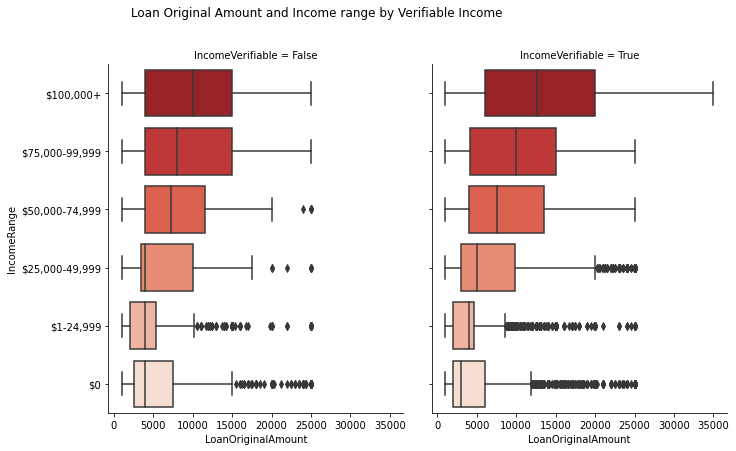

In [6]:
#Creating a multivariate visualization of loan amount taken and income range by verifiable income
ordinalCategory = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999','$0']
box = sns.FacetGrid(data = df_prosper_rating, col = 'IncomeVerifiable', height = 3)
box.map(sns.boxplot, 'LoanOriginalAmount', 'IncomeRange', order=ordinalCategory, palette = "Reds_r")
plt.suptitle('Loan Original Amount and Income range by Verifiable Income', y = 1.0)
box.fig.set_size_inches(12,7);

In [ ]:
!jupyter nbconvert Part_II_slide_deck_Seun_Olukanmi.ipynb --to slides --post serve --no-input --no-prompt
